In [ ]:
!pip install fastf1

In [ ]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

In [ ]:
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

In [ ]:
circuit_info = session.get_circuit_info()

In [ ]:
# By matrix multiplication of the rotation matrix with a vector [x, y], a new rotated vector [x_rot, y_rot] is obtained.
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

    return np.matmul(xy, rot_mat)

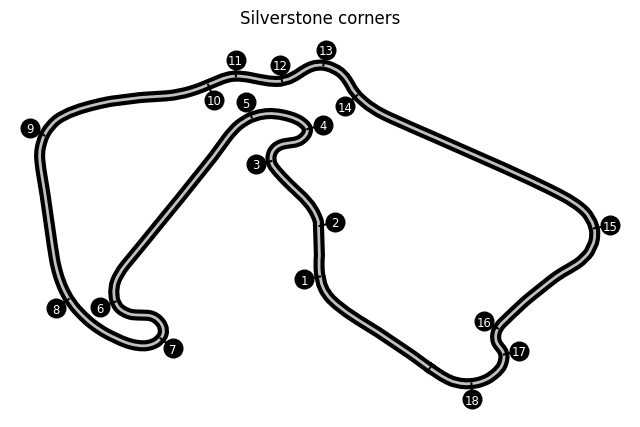

In [ ]:
plt.figure(figsize=(8, 5), facecolor='white')
plt.axes().set_facecolor('white')

# Get the coordinates of the track and rotate them using the rotation from "circuit_info" to orient the track correctly and plot it:
# 1-Get an array of shape [n, 2] where n is the number of points and the second axis is x and y
track = pos.loc[:, ('X', 'Y')].to_numpy()

# 2-Convert the rotation angle from degrees to radian
track_angle = circuit_info.rotation / 180 * np.pi

# 3-Rotate it
rotated_track = rotate(track, angle=track_angle)

# 4-PLOT THE TRACK MAP (SHAPE)
# Create background track line and main line
plt.plot(rotated_track[:, 0], rotated_track[:, 1], color='black', linewidth=8)
plt.plot(rotated_track[:, 0], rotated_track[:, 1], color='silver', linewidth=2)

# To get a line, the circular bubble and the corner number inside:
# 1-Length of the line connecting bubble and track
offset_vector = [500, 0]

# 2-Iterate over all corners
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='black', s=180)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='black')

    # Finally, PRINT THE CORNER NUMBER inside the circle.
    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='small', color='white')

# PLOT DETAILS: Add a title, remove tick labels, set equal axis ratio (not distorted), remove axis.
plt.title(f"{session.event['Location']} corners", color='black')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.axis('off')

plt.show()